<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Для воспроизводимости экспериментов`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [4]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [5]:
df_test.duplicated().sum()

np.int64(62)

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

In [7]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

`Выводы - довольно стандартный небольшой датасет - имеются пропущенные значения и дубликаты, лучше всего с таргетом коррелирует transmission и годом выпуска. Вещественные переменные распределены нормально или логнормально`

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [8]:
df_train.describe(include='all')

name         year  selling_price     km_driven  \
count                     6999  6999.000000   6.999000e+03  6.999000e+03   
unique                    1924          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       116          NaN            NaN           NaN   
mean                       NaN  2013.818403   6.395152e+05  6.958462e+04   
std                        NaN     4.053095   8.089419e+05  5.772400e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.700000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     6999        6999         6999         6999       6797     6797   
unique       4           3            2            5        386      120   
top     Diesel  Individual       Manual  First Owner  18.9 kmpl  1248 CC   
freq      3793        5826         6095         4587        197      885   
mean       NaN         NaN          NaN          NaN        NaN      NaN   
std        NaN         NaN          NaN          NaN        NaN      NaN   
min        NaN         NaN          NaN          NaN        NaN      NaN   
25%        NaN         NaN          NaN          NaN        NaN      NaN   
50%        NaN         NaN          NaN          NaN        NaN      NaN   
75%        NaN         NaN          NaN          NaN        NaN      NaN   
max        NaN         NaN          NaN          NaN        NaN      NaN   

       max_power          torque        seats  
count       6803            6796  6797.000000  
unique       316             419          NaN  
top       74 bhp  190Nm@ 2000rpm          NaN  
freq         330             468          NaN  
mean         NaN             NaN     5.419008  
std          NaN             NaN     0.965767  
min          NaN             NaN     2.000000  
25%          NaN             NaN     5.000000  
50%          NaN             NaN     5.000000  
75%          NaN             NaN     5.000000  
max          NaN             NaN    14.000000

In [9]:
df_test.describe(include='all')

name         year  selling_price      km_driven  \
count                  1000  1000.000000   1.000000e+03    1000.000000   
unique                  621          NaN            NaN            NaN   
top     Maruti Alto 800 LXI          NaN            NaN            NaN   
freq                     15          NaN            NaN            NaN   
mean                    NaN  2013.681000   6.179010e+05   71393.341000   
std                     NaN     4.012149   7.585539e+05   48486.218662   
min                     NaN  1995.000000   3.100000e+04    1303.000000   
25%                     NaN  2011.000000   2.500000e+05   37000.000000   
50%                     NaN  2014.000000   4.349990e+05   61500.000000   
75%                     NaN  2017.000000   6.700000e+05  100000.000000   
max                     NaN  2020.000000   6.000000e+06  375000.000000   

          fuel seller_type transmission        owner    mileage   engine  \
count     1000        1000         1000         1000        981      981   
unique       4           3            2            5        237       88   
top     Diesel  Individual       Manual  First Owner  18.6 kmpl  1248 CC   
freq       534         837          877          623         23      116   
mean       NaN         NaN          NaN          NaN        NaN      NaN   
std        NaN         NaN          NaN          NaN        NaN      NaN   
min        NaN         NaN          NaN          NaN        NaN      NaN   
25%        NaN         NaN          NaN          NaN        NaN      NaN   
50%        NaN         NaN          NaN          NaN        NaN      NaN   
75%        NaN         NaN          NaN          NaN        NaN      NaN   
max        NaN         NaN          NaN          NaN        NaN      NaN   

       max_power          torque       seats  
count        981             981  981.000000  
unique       182             226         NaN  
top       74 bhp  200Nm@ 1750rpm         NaN  
freq          43              57         NaN  
mean         NaN             NaN    5.410805  
std          NaN             NaN    0.919985  
min          NaN             NaN    4.000000  
25%          NaN             NaN    5.000000  
50%          NaN             NaN    5.000000  
75%          NaN             NaN    5.000000  
max          NaN             NaN    9.000000

`Статистики довольно похожи по трейну и тесту, особенно средние значения. Медиана отличается у year и selling_price - видимо есть небольшой сдвиг, но не особо значимый`

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [10]:
dupl_mask = df_train[df_train.columns.difference(['selling_price'])].duplicated()
df_train[dupl_mask]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [11]:
df_train = df_train[~dupl_mask].reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [12]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [13]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].apply(lambda x: str(x).split()[0] if len(str(x).split()) > 1 else 0).astype(float)
    df_test[col] = df_test[col].apply(lambda x: str(x).split()[0] if len(str(x).split()) > 1 else 0).astype(float)

In [14]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    18.813920  1389.701027   
std       4.095622   5.354320e+05  6.007114e+04     5.247306   546.195082   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000     0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.200000  1193.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.100000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

        max_power       seats  
count  5840.00000  5654.00000  
mean     85.32722     5.44075  
std      35.16849     0.99527  
min       0.00000     2.00000  
25%      67.05000     5.00000  
50%      81.80000     5.00000  
75%      99.00000     5.00000  
max     400.00000    14.00000

In [15]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    18.813920  1389.701027   
std       4.095622   5.354320e+05  6.007114e+04     5.247306   546.195082   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000     0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.200000  1193.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.100000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

        max_power       seats  
count  5840.00000  5654.00000  
mean     85.32722     5.44075  
std      35.16849     0.99527  
min       0.00000     2.00000  
25%      67.05000     5.00000  
50%      81.80000     5.00000  
75%      99.00000     5.00000  
max     400.00000    14.00000

In [16]:
import re


def convert_torque(value, unit):
    if unit == "kgm":
        return float(value) * 9.80665
    elif unit == "nm":
        return float(value)
    return None


def parse_torque(x):
    x = str(x)
    # gpt-4o helped to write regexps and processing
    torque_match = re.search(r"(\d+\.?\d*)\s*(nm|kgm)", x, re.IGNORECASE)
    rpm_match = re.search(r"(\d{1,3}(?:,\d{3}|\d*)?)\s*-\s*(\d{1,3}(?:,\d{3}|\d*)?)\s*rpm|(\d{1,4}(?:,\d{3}|\d*)?)\s*rpm", x, re.IGNORECASE)
    
    torque_value, rpm_max = 0, 0
    if torque_match:
        torque_value = convert_torque(torque_match.group(1), torque_match.group(2).lower())

    if rpm_match:
        if rpm_match.group(1) and rpm_match.group(2):
            rpm_max = int(rpm_match.group(2).replace(",", ""))
        elif rpm_match.group(3):
            rpm_max = int(rpm_match.group(3).replace(",", ""))

    return pd.Series([torque_value, rpm_max])

df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(parse_torque)
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    18.813920  1389.701027   
std       4.095622   5.354320e+05  6.007114e+04     5.247306   546.195082   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000     0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.200000  1193.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.100000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

        max_power       torque       seats  max_torque_rpm  
count  5840.00000  5840.000000  5654.00000     5840.000000  
mean     85.32722   156.990155     5.44075     2770.172603  
std      35.16849    96.031736     0.99527     1226.405610  
min       0.00000     0.000000     2.00000        0.000000  
25%      67.05000    91.000000     5.00000     2000.000000  
50%      81.80000   145.000000     5.00000     2800.000000  
75%      99.00000   200.000000     5.00000     4000.000000  
max     400.00000   789.000000    14.00000     5300.000000

In [17]:
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(parse_torque)
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    18.970780  1431.16400   
std       4.012149   7.585539e+05   48486.218662     4.753277   557.99609   
min    1995.000000   3.100000e+04    1303.000000     0.000000     0.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.200000  1196.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.250000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power       torque       seats  max_torque_rpm  
count  1000.000000  1000.000000  981.000000     1000.000000  
mean     89.286330   164.298914    5.410805     2863.096000  
std      37.020828    98.097506    0.919985     1181.891543  
min       0.000000     0.000000    4.000000        0.000000  
25%      68.000000    99.030000    5.000000     2000.000000  
50%      82.425000   150.000000    5.000000     2800.000000  
75%     102.000000   205.000000    5.000000     4000.000000  
max     280.000000   620.000000    9.000000     5200.000000

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [18]:
fill_cols = ['mileage', 'engine', 'max_power', 'torque', 'seats']
medians_train = df_train[fill_cols].median().to_dict()
medians_train

{'mileage': 19.1,
 'engine': 1248.0,
 'max_power': 81.8,
 'torque': 145.0,
 'seats': 5.0}

In [19]:
for col in fill_cols:
    df_train[col] = df_train[col].fillna(medians_train[col])
    df_test[col] = df_test[col].fillna(medians_train[col])

df_train[fill_cols].isna().sum()

mileage      0
engine       0
max_power    0
torque       0
seats        0
dtype: int64

In [20]:
df_test[fill_cols].isna().sum()

mileage      0
engine       0
max_power    0
torque       0
seats        0
dtype: int64

`В общем случае лучше заполнять медианой, так как есть ordinal/categorical переменные, как например seats, которые не могут принимать нецелое значение. Однако вещественные признаки можно заменять средним. Важное условие - считать статистики только на трейне, чтобы не допустить ликов в данных. Также медиана более устойчива к выбросам и скошенным распределениям`

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [21]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [22]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   int64  
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


`seats - это скорее ordinal переменная, т.е. нам важен ее порядок (1 сиденье < 3 сидений), при этом не может быть 2.5 сидений. Также признак можно рассмотреть как categorical, потому что есть 5 различных вариантов для транспорта, и никакхи других не допускается`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [23]:
df_train.describe(include='all')

name         year  selling_price     km_driven  \
count                     5840  5840.000000   5.840000e+03  5.840000e+03   
unique                    1924          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                        91          NaN            NaN           NaN   
mean                       NaN  2013.428425   5.229601e+05  7.395224e+04   
std                        NaN     4.095622   5.354320e+05  6.007114e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.500000e+05  3.900000e+04   
50%                        NaN  2014.000000   4.050000e+05  7.000000e+04   
75%                        NaN  2017.000000   6.400000e+05  1.000000e+05   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner      mileage  \
count     5840        5840         5840         5840  5840.000000   
unique       4           3            2            5          NaN   
top     Diesel  Individual       Manual  First Owner          NaN   
freq      3177        5223         5336         3603          NaN   
mean       NaN         NaN          NaN          NaN    18.813920   
std        NaN         NaN          NaN          NaN     5.247306   
min        NaN         NaN          NaN          NaN     0.000000   
25%        NaN         NaN          NaN          NaN    16.200000   
50%        NaN         NaN          NaN          NaN    19.100000   
75%        NaN         NaN          NaN          NaN    22.300000   
max        NaN         NaN          NaN          NaN    42.000000   

             engine   max_power       torque        seats  max_torque_rpm  
count   5840.000000  5840.00000  5840.000000  5840.000000     5840.000000  
unique          NaN         NaN          NaN          NaN             NaN  
top             NaN         NaN          NaN          NaN             NaN  
freq            NaN         NaN          NaN          NaN             NaN  
mean    1389.701027    85.32722   156.990155     5.426712     2770.172603  
std      546.195082    35.16849    96.031736     0.982344     1226.405610  
min        0.000000     0.00000     0.000000     2.000000        0.000000  
25%     1193.000000    67.05000    91.000000     5.000000     2000.000000  
50%     1248.000000    81.80000   145.000000     5.000000     2800.000000  
75%     1498.000000    99.00000   200.000000     5.000000     4000.000000  
max     3604.000000   400.00000   789.000000    14.000000     5300.000000

In [24]:
df_test.describe(include='all')

name         year  selling_price      km_driven  \
count                  1000  1000.000000   1.000000e+03    1000.000000   
unique                  621          NaN            NaN            NaN   
top     Maruti Alto 800 LXI          NaN            NaN            NaN   
freq                     15          NaN            NaN            NaN   
mean                    NaN  2013.681000   6.179010e+05   71393.341000   
std                     NaN     4.012149   7.585539e+05   48486.218662   
min                     NaN  1995.000000   3.100000e+04    1303.000000   
25%                     NaN  2011.000000   2.500000e+05   37000.000000   
50%                     NaN  2014.000000   4.349990e+05   61500.000000   
75%                     NaN  2017.000000   6.700000e+05  100000.000000   
max                     NaN  2020.000000   6.000000e+06  375000.000000   

          fuel seller_type transmission        owner      mileage      engine  \
count     1000        1000         1000         1000  1000.000000  1000.00000   
unique       4           3            2            5          NaN         NaN   
top     Diesel  Individual       Manual  First Owner          NaN         NaN   
freq       534         837          877          623          NaN         NaN   
mean       NaN         NaN          NaN          NaN    18.970780  1431.16400   
std        NaN         NaN          NaN          NaN     4.753277   557.99609   
min        NaN         NaN          NaN          NaN     0.000000     0.00000   
25%        NaN         NaN          NaN          NaN    16.200000  1196.00000   
50%        NaN         NaN          NaN          NaN    19.250000  1248.00000   
75%        NaN         NaN          NaN          NaN    22.300000  1582.00000   
max        NaN         NaN          NaN          NaN    32.260000  3604.00000   

          max_power       torque        seats  max_torque_rpm  
count   1000.000000  1000.000000  1000.000000     1000.000000  
unique          NaN          NaN          NaN             NaN  
top             NaN          NaN          NaN             NaN  
freq            NaN          NaN          NaN             NaN  
mean      89.286330   164.298914     5.403000     2863.096000  
std       37.020828    98.097506     0.912921     1181.891543  
min        0.000000     0.000000     4.000000        0.000000  
25%       68.000000    99.030000     5.000000     2000.000000  
50%       82.425000   150.000000     5.000000     2800.000000  
75%      102.000000   205.000000     5.000000     4000.000000  
max      280.000000   620.000000     9.000000     5200.000000

`Заполнение медианой могло немного двинуть распределения в сторону "уравновешивания" - таким образом растим основную массу распределения. Вот если заменить средним, то при наличии выбросов среднее значение может сильно измениться и скосить распределения`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [25]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

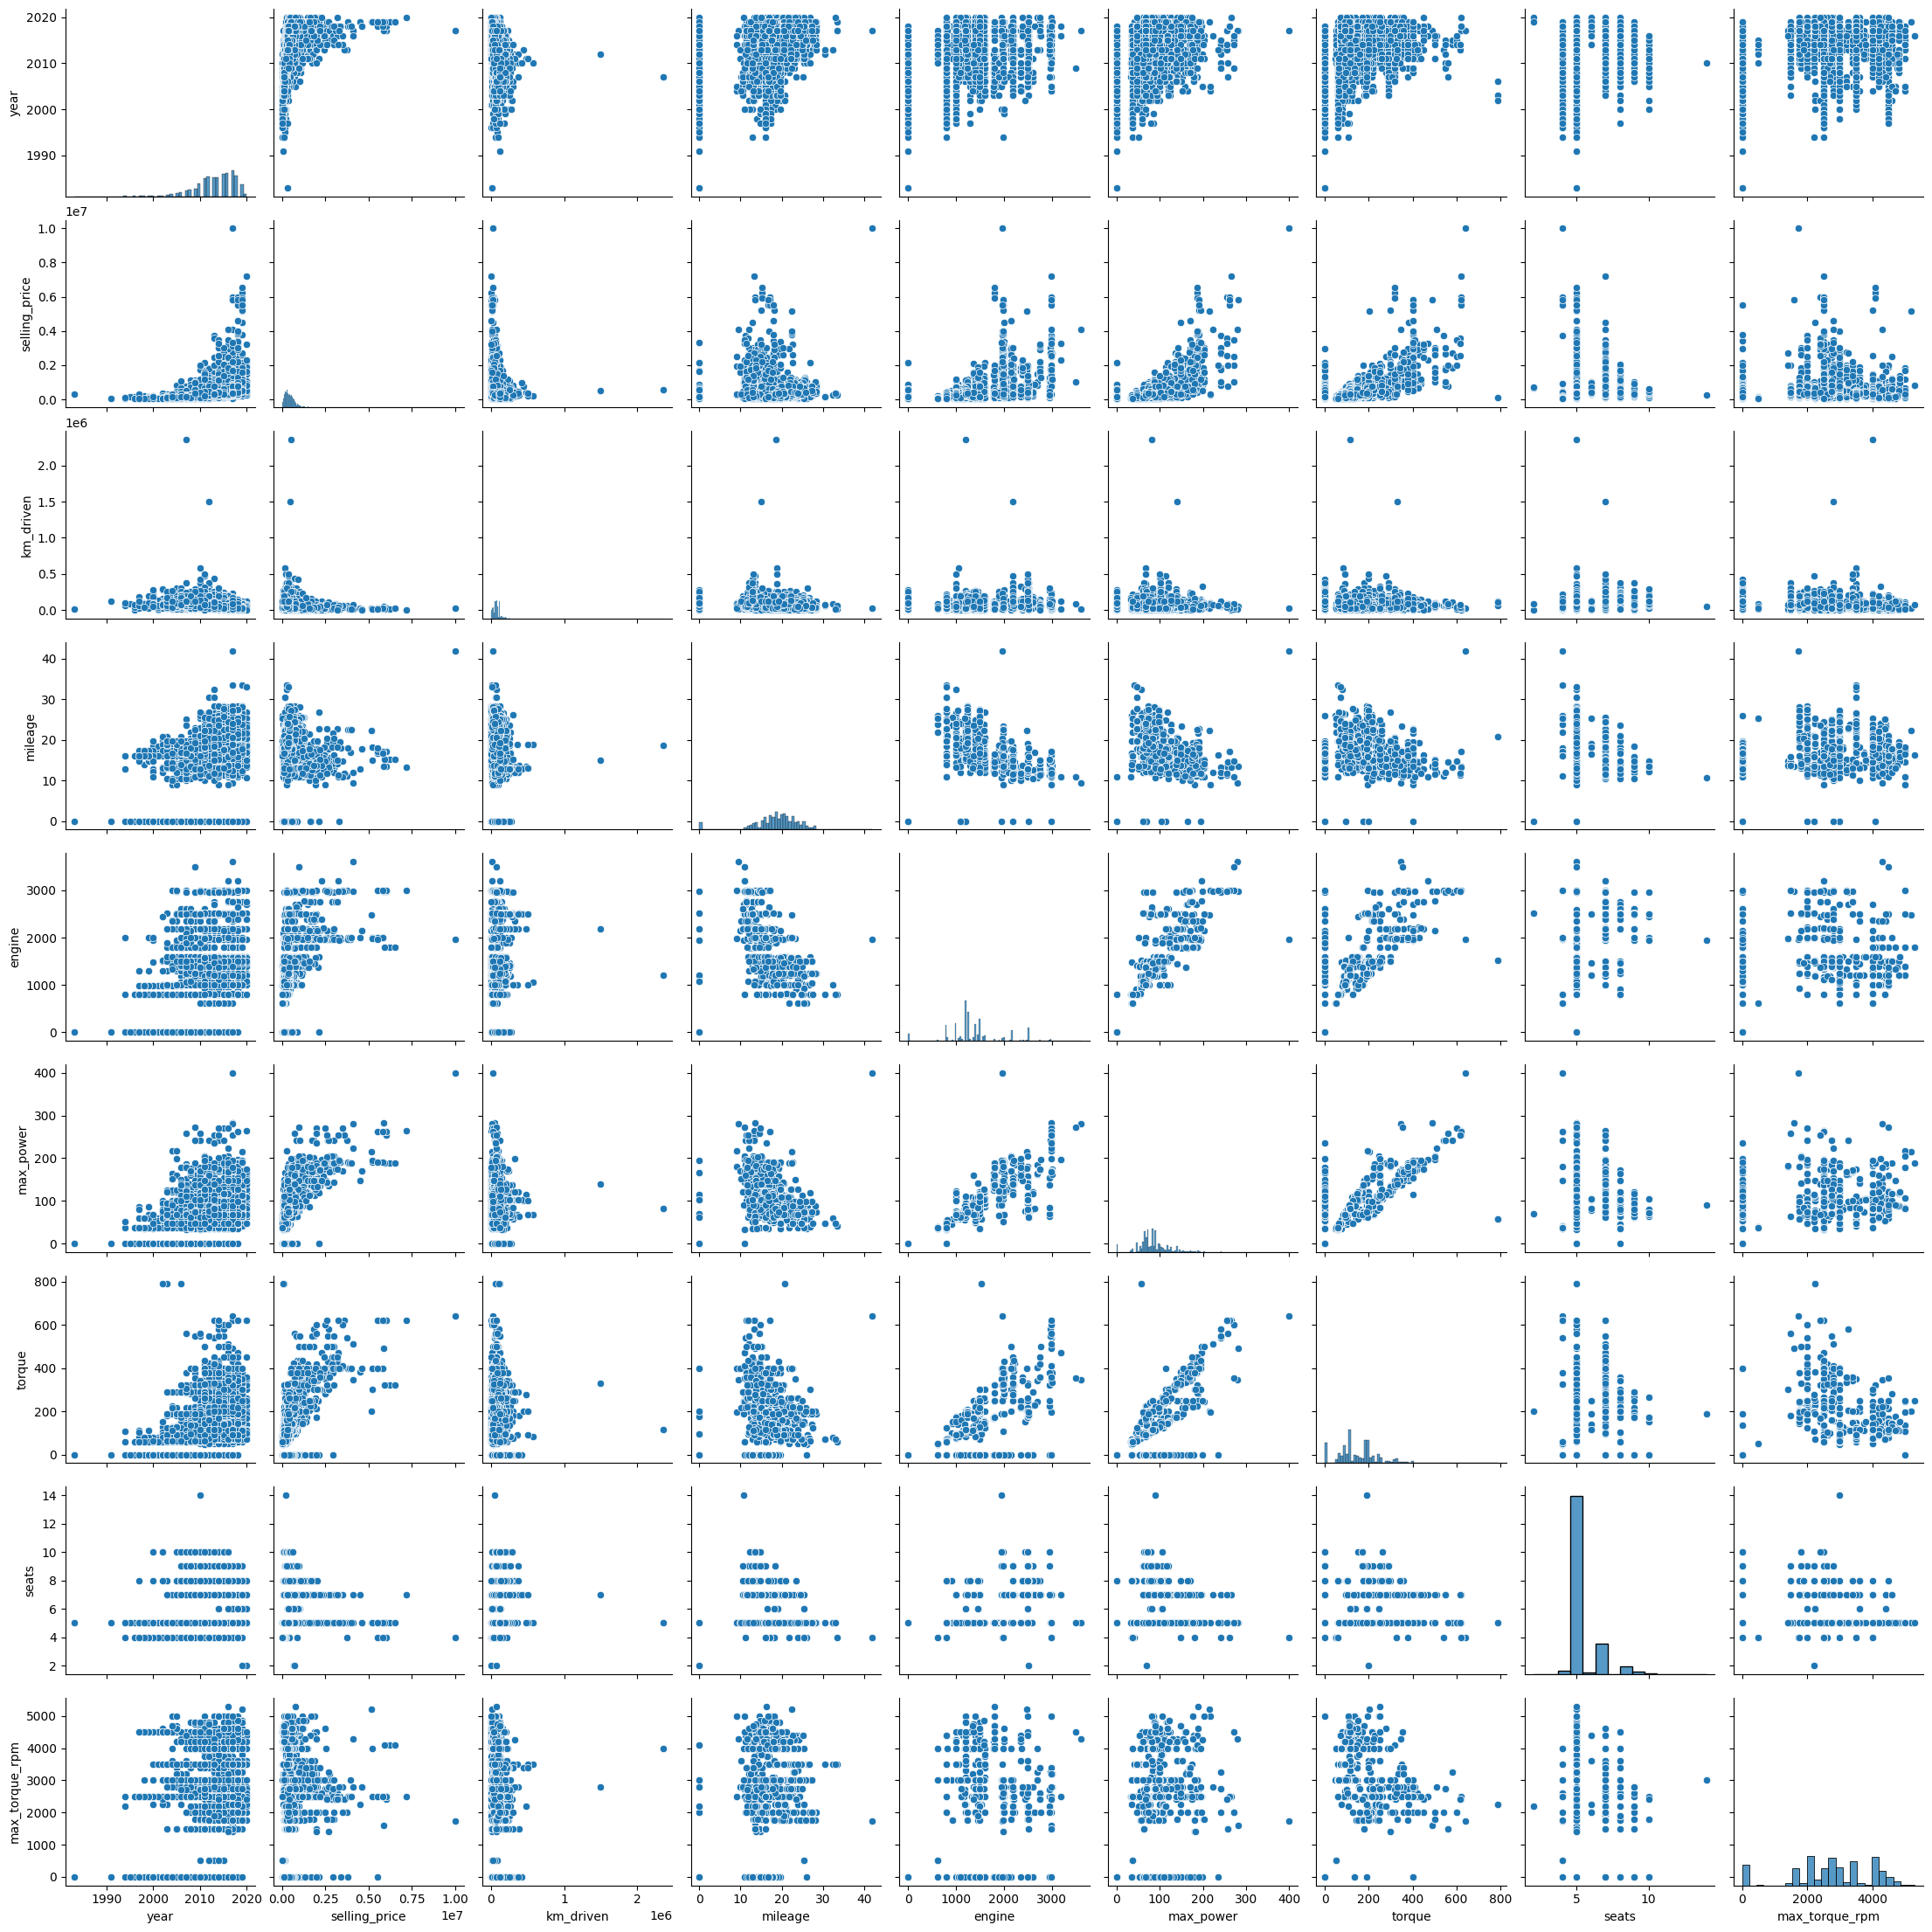

In [26]:
%matplotlib inline

sns.pairplot(df_train)

`На основе pairplot можно делать выводы о корреляции переменных, но не о зависимости, так как correlation doesnt mean causation. Поэтому можно говорить только о статистической взаимосвязи, например у engine, torque, max_power`

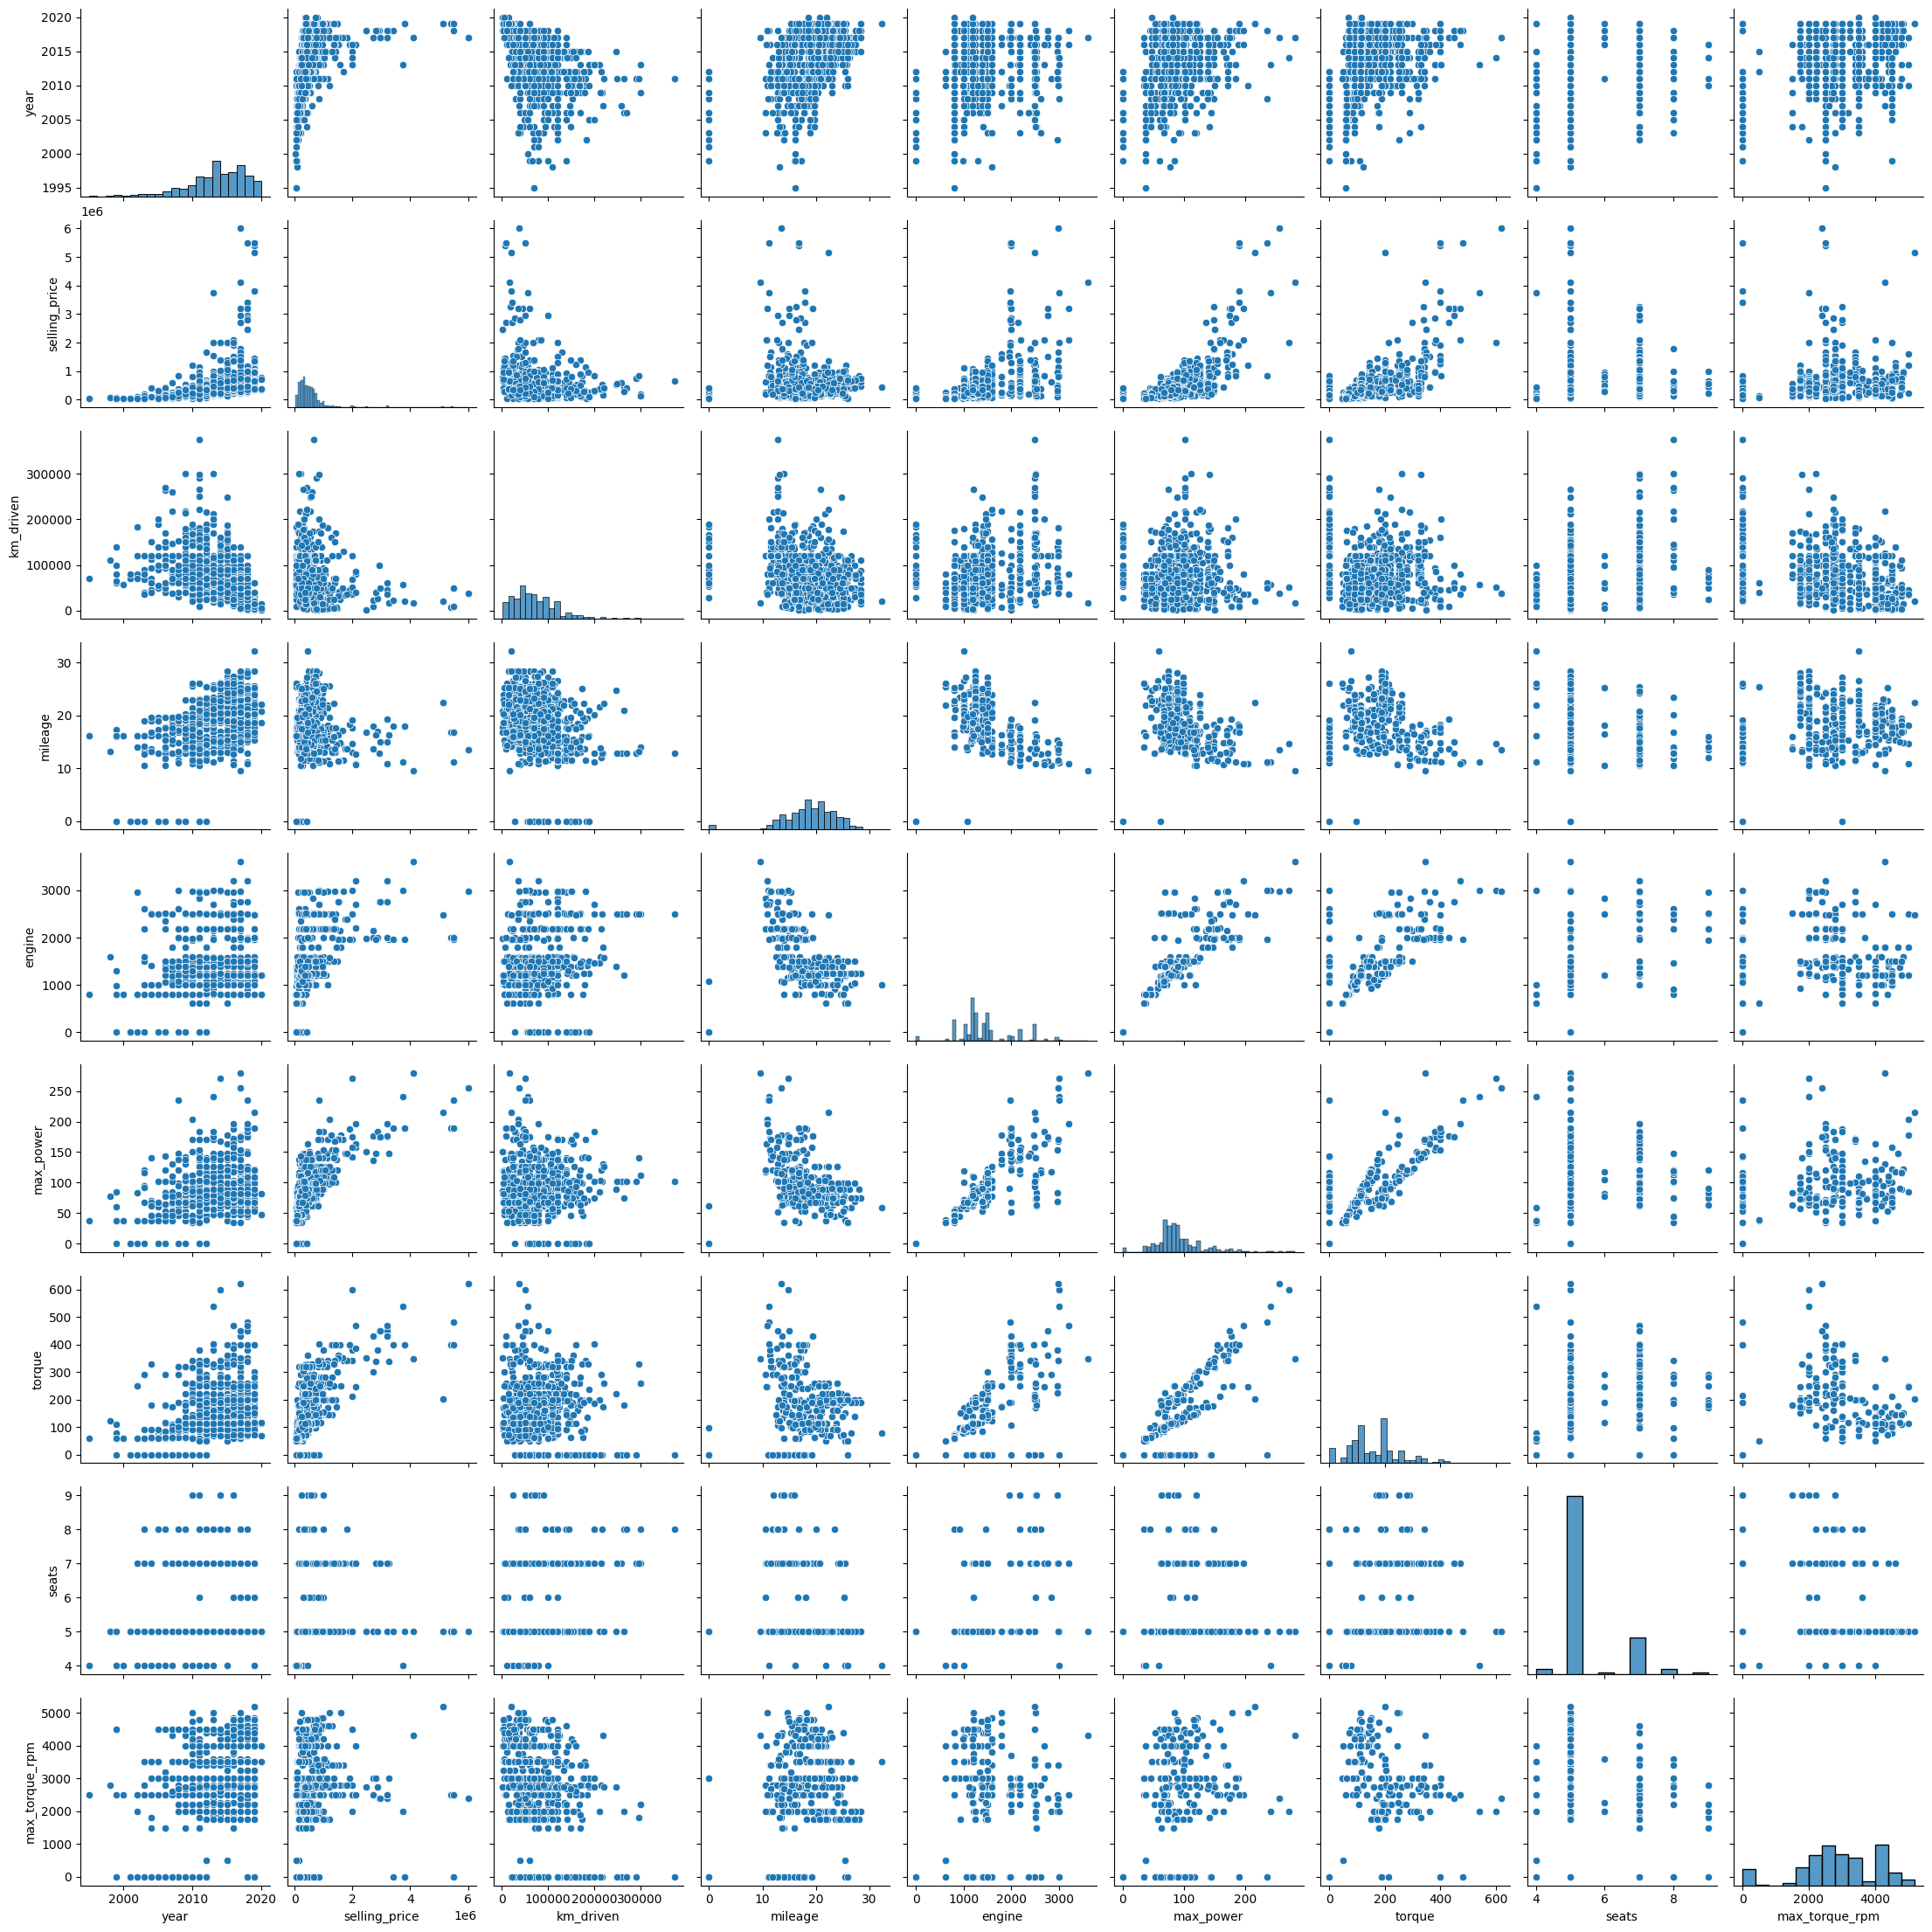

In [27]:
%matplotlib inline

sns.pairplot(df_test)

`Да, распределения получились довольно похожими, с первого взгляда найти отличия трудно`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [29]:
corr = df_train.select_dtypes(exclude=object).corr()
corr

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.436442  0.112162   
selling_price   0.427279       1.000000  -0.164828 -0.014356  0.438434   
km_driven      -0.368966      -0.164828   1.000000 -0.172350  0.183236   
mileage         0.436442      -0.014356  -0.172350  1.000000 -0.086924   
engine          0.112162       0.438434   0.183236 -0.086924  1.000000   
max_power       0.254110       0.664374   0.000401  0.031612  0.746166   
torque          0.316988       0.604151   0.017917  0.113766  0.635720   
seats           0.041178       0.149953   0.192328 -0.291556  0.611512   
max_torque_rpm  0.341585       0.034462  -0.281187  0.276391 -0.047406   

                max_power    torque     seats  max_torque_rpm  
year             0.254110  0.316988  0.041178        0.341585  
selling_price    0.664374  0.604151  0.149953        0.034462  
km_driven        0.000401  0.017917  0.192328       -0.281187  
mileage          0.031612  0.113766 -0.291556        0.276391  
engine           0.746166  0.635720  0.611512       -0.047406  
max_power        1.000000  0.763128  0.250267        0.159075  
torque           0.763128  1.000000  0.301440        0.085251  
seats            0.250267  0.301440  1.000000       -0.165996  
max_torque_rpm   0.159075  0.085251 -0.165996        1.000000

<Axes: >

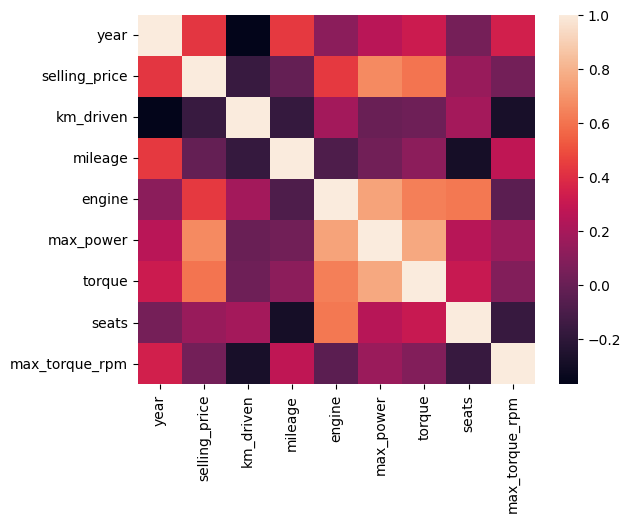

In [30]:
sns.heatmap(corr)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Наименее скоррелированы max_power и km_drivem, тк по логике это ортогональные показатели. Хорошо скоррелированы selling_price и max_power, toeque, engine`

`Можно говорить о явной отрицательно корреляции (тенденции) между km_driven и годом выпуска, действительно наблюдается несильно выраженная статистическая закономерность`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [31]:
def kendall(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    
    i, j = np.triu_indices(n, k=1)
    dx = x[i] - x[j]
    dy = y[i] - y[j]

    concordant = np.sum(dx * dy > 0)
    discordant = np.sum(dx * dy < 0)
    
    ties_x = np.sum(dx == 0)
    ties_y = np.sum(dy == 0)

    total_pairs = n * (n - 1) / 2
    tau = (concordant - discordant) / np.sqrt(
        (total_pairs - ties_x) * (total_pairs - ties_y)
    )
    return tau


In [ ]:
from scipy.stats import kendalltau

assert kendalltau(df_train['engine'], df_train['km_driven'])[0] == kendall(df_train['engine'], df_train['km_driven'])

In [33]:
import phik

df_train.phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


name      year  selling_price  km_driven      fuel  \
name            1.000000  0.948995       0.994871   0.000000  1.000000   
year            0.948995  1.000000       0.219841   0.081574  0.205834   
selling_price   0.994871  0.219841       1.000000   0.000000  0.157885   
km_driven       0.000000  0.081574       0.000000   1.000000  0.046285   
fuel            1.000000  0.205834       0.157885   0.046285  1.000000   
seller_type     0.799127  0.232412       0.334505   0.000000  0.050771   
transmission    1.000000  0.153714       0.463058   0.012824  0.053721   
owner           0.830098  0.418636       0.557641   0.087887  0.030943   
mileage         0.999225  0.345783       0.649224   0.082685  0.585612   
engine          0.999895  0.293322       0.481676   0.186929  0.506865   
max_power       0.997679  0.471455       0.872231   0.000000  0.225513   
torque          0.999929  0.379306       0.751557   0.077760  0.673053   
seats           0.999985  0.288178       0.196447   0.096223  0.450714   
max_torque_rpm  0.999880  0.529474       0.251471   0.119720  0.629174   

                seller_type  transmission     owner   mileage    engine  \
name               0.799127      1.000000  0.830098  0.999225  0.999895   
year               0.232412      0.153714  0.418636  0.345783  0.293322   
selling_price      0.334505      0.463058  0.557641  0.649224  0.481676   
km_driven          0.000000      0.012824  0.087887  0.082685  0.186929   
fuel               0.050771      0.053721  0.030943  0.585612  0.506865   
seller_type        1.000000      0.127968  0.176612  0.056889  0.183622   
transmission       0.127968      1.000000  0.096990  0.325531  0.492490   
owner              0.176612      0.096990  1.000000  0.176094  0.176453   
mileage            0.056889      0.325531  0.176094  1.000000  0.737740   
engine             0.183622      0.492490  0.176453  0.737740  1.000000   
max_power          0.336579      0.512044  0.171934  0.759342  0.768756   
torque             0.220460      0.557844  0.262802  0.737242  0.835125   
seats              0.032173      0.045734  0.046741  0.624433  0.606939   
max_torque_rpm     0.167863      0.123624  0.217895  0.554206  0.665676   

                max_power    torque     seats  max_torque_rpm  
name             0.997679  0.999929  0.999985        0.999880  
year             0.471455  0.379306  0.288178        0.529474  
selling_price    0.872231  0.751557  0.196447        0.251471  
km_driven        0.000000  0.077760  0.096223        0.119720  
fuel             0.225513  0.673053  0.450714        0.629174  
seller_type      0.336579  0.220460  0.032173        0.167863  
transmission     0.512044  0.557844  0.045734        0.123624  
owner            0.171934  0.262802  0.046741        0.217895  
mileage          0.759342  0.737242  0.624433        0.554206  
engine           0.768756  0.835125  0.606939        0.665676  
max_power        1.000000  0.869881  0.432011        0.638554  
torque           0.869881  1.000000  0.441640        0.691463  
seats            0.432011  0.441640  1.000000        0.361560  
max_torque_rpm   0.638554  0.691463  0.361560        1.000000

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

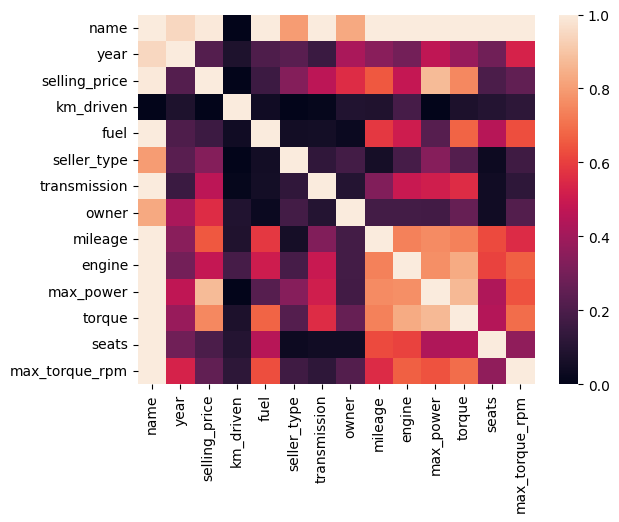

In [34]:
sns.heatmap(df_train.phik_matrix())

`Из необычного - практически идеальная корреляция name практически со всеми переменнами - это аномалия из-за высокой гранулярности значений признака. Однако km_driven с названием авто не коррелирует, видимо из-за разных лет выпуска моделей. В остальном матрица похоже на обычную матрицу корреляций, однако значения вутри матрицы сильно ниже`

In [35]:
df_train.global_phik()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(
/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


(array([[1.        ],
        [0.5029034 ],
        [1.        ],
        [0.22080775],
        [1.        ],
        [       nan],
        [0.37886992],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.56610137],
        [0.75108777]]),
 array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
        'seller_type', 'transmission', 'owner', 'mileage', 'engine',
        'max_power', 'torque', 'seats', 'max_torque_rpm'], dtype=object))

In [36]:
df_train.significance_matrix()

/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


name        year  selling_price  km_driven       fuel  \
name            62.014378   45.232546      21.897956   2.930777  56.739878   
year            45.232546  127.986866      14.981407   6.219255  15.177327   
selling_price   21.897956   14.981407      59.568108  -0.465430  13.652037   
km_driven        2.930777    6.219255      -0.465430  26.136695   5.448564   
fuel            56.739878   15.177327      13.652037   5.448564  93.975796   
seller_type     15.415200   11.173964      12.143249   2.290827   4.974703   
transmission    30.813552   10.797480      25.162489   2.232020   3.192084   
owner           14.953044   38.401019      10.605150   3.655178   2.223823   
mileage         66.636996   33.996223      15.868770   6.144187  29.850678   
engine          67.981199   23.464586      31.644035   7.882058  46.485745   
max_power       63.182432   26.993804      38.036447   0.184441  18.910287   
torque          69.020216   33.778124      34.707935   3.884233  67.632415   
seats           44.809848   17.863756      13.633555   6.825963  29.838841   
max_torque_rpm  74.880637   37.055619      14.453625   6.689341  66.987377   

                seller_type  transmission       owner     mileage      engine  \
name              15.415200     30.813552   14.953044   66.636996   67.981199   
year              11.173964     10.797480   38.401019   33.996223   23.464586   
selling_price     12.143249     25.162489   10.605150   15.868770   31.644035   
km_driven          2.290827      2.232020    3.655178    6.144187    7.882058   
fuel               4.974703      3.192084    2.223823   29.850678   46.485745   
seller_type       64.105217     13.508853   14.940674    2.603815    9.448482   
transmission      13.508853     58.282485    7.491518   14.044635   21.308123   
owner             14.940674      7.491518  104.627466   14.728400    8.011116   
mileage            2.603815     14.044635   14.728400  129.934291   65.534329   
engine             9.448482     21.308123    8.011116   65.534329  135.446310   
max_power         13.681055     28.879349   11.324978   46.108907   77.679513   
torque            11.548395     24.513255   14.217735   49.913869   77.773083   
seats              2.498891      2.710023    3.343051   45.051383   56.332623   
max_torque_rpm     6.457108      8.571977   16.859431   52.747916   62.594529   

                 max_power      torque      seats  max_torque_rpm  
name             63.182432   69.020216  44.809848       74.880637  
year             26.993804   33.778124  17.863756       37.055619  
selling_price    38.036447   34.707935  13.633555       14.453625  
km_driven         0.184441    3.884233   6.825963        6.689341  
fuel             18.910287   67.632415  29.838841       66.987377  
seller_type      13.681055   11.548395   2.498891        6.457108  
transmission     28.879349   24.513255   2.710023        8.571977  
owner            11.324978   14.217735   3.343051       16.859431  
mileage          46.108907   49.913869  45.051383       52.747916  
engine           77.679513   77.773083  56.332623       62.594529  
max_power       119.345142   68.114085  31.782837       46.308207  
torque           68.114085  131.529246  39.310648       80.580112  
seats            31.782837   39.310648  90.818611       32.256177  
max_torque_rpm   46.308207   80.580112  32.256177      150.968229

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [37]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [38]:
df_train_num = df_train.select_dtypes(exclude=object).copy(deep=True)
df_test_num = df_test.select_dtypes(exclude=object).copy(deep=True)
df_train_num.shape, df_test_num.shape

((5840, 9), (1000, 9))

In [39]:
y_train = df_train['selling_price']
X_train = df_train_num.drop(columns=['selling_price'])

In [40]:
X_train

year  km_driven  mileage  engine  max_power     torque  seats  \
0     2014     145500    23.40    1248      74.00  190.00000      5   
1     2014     120000    21.14    1498     103.52  250.00000      5   
2     2010     127000    23.00    1396      90.00  219.66896      5   
3     2007     120000    16.10    1298      88.20    0.00000      5   
4     2017      45000    20.14    1197      81.86  113.75000      5   
...    ...        ...      ...     ...        ...        ...    ...   
5835  2008     191000    17.92    1086      62.10   96.10000      5   
5836  2013      50000    18.90     998      67.10   90.00000      5   
5837  2013     110000    18.50    1197      82.85  113.70000      5   
5838  2007     119000    16.80    1493     110.00    0.00000      5   
5839  2009     120000    19.30    1248      73.90  190.00000      5   

      max_torque_rpm  
0             2000.0  
1             2500.0  
2             2750.0  
3                0.0  
4             4000.0  
...              ...  
5835          3000.0  
5836          3500.0  
5837          4000.0  
5838             0.0  
5839          2000.0  

[5840 rows x 8 columns]

In [41]:
# fixed assert cols count because of parsing torque column
assert X_train.shape == (5840, 8)

In [42]:
y_test = df_test['selling_price']
X_test = df_test_num.drop(columns=['selling_price'])

In [43]:
# fixed assert cols count because of parsing torque column
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X_train, y_train)
preds = linreg.predict(X_test)
r2_score(y_test, preds), MSE(y_test, preds)

(0.596461128837409, np.float64(231965666454.3605))

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [45]:
def r2(y_true, y_pred, eps=10e-4):
    return 1 - ((y_true - y_pred) ** 2).sum() / (((y_true - y_true.mean()) ** 2).sum() + eps)

In [46]:
assert r2_score(y_test, preds) == r2(y_test, preds)

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$
$$
\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$
где $\sum_{i=1}^n (y_i - \bar{y}_i)^2$ - дисперсия таргета,

$\sum_{i=1}^n (y_i - \hat{y}_i)^2$ - дисперсия ошибки модели

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [47]:
def r2_adjusted(y_true, y_pred, n_feats, eps=10e-4):
    df_tot = len(y_true) - 1
    df_res = len(y_true) - n_feats - 1
    return 1 - ((y_true - y_pred) ** 2).sum() / (((y_true - y_true.mean()) ** 2).sum() + eps) * (df_tot / df_res)

In [48]:
r2_adjusted(y_test, preds, df_train.shape[1])

np.float64(0.590725550973169)

`R2_adjusted, в отличие от R2, учитывает сложность модели при помощи параметра p - количества признаков в модели. Тем самым штрафуя модель с экстремально большим количеством признаков`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
preds = linreg.predict(X_test_scaled)
r2_score(y_test, preds), MSE(y_test, preds)

(0.5964611288374115, np.float64(231965666454.35904))

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [51]:
for name, coef in zip(X_test.columns, linreg.coef_):
    print(f"{name}, coef = {coef}")

year, coef = 190361.89942889143
km_driven, coef = -47683.71185174801
mileage, coef = -109836.9367727941
engine, coef = -60646.30375541613
max_power, coef = 300115.7082913879
torque, coef = 104905.07262771472
seats, coef = -35846.075013806476
max_torque_rpm, coef = -95133.64985402435


`Самый информативный признак для модели - год выпуска автомобиля`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso(10)
lasso.fit(X_train_scaled, y_train)
preds = lasso.predict(X_test_scaled)
r2_score(y_test, preds), MSE(y_test, preds)

(0.5964442539912527, np.float64(231975366597.80313))

In [53]:
for name, coef in zip(X_train.columns, lasso.coef_):
    print(f"{name}, coef = {coef}")

year, coef = 190345.32264076002
km_driven, coef = -47679.515404615515
mileage, coef = -109817.33423798875
engine, coef = -60599.70666602413
max_power, coef = 300079.23988489853
torque, coef = 104893.51985808097
seats, coef = -35842.89022302869
max_torque_rpm, coef = -95112.70170217365


`Веса модели могли не занулиться по многим причинам - в основном из-за несопоставимого масштаба MSE и регуляризауции, возможно наличия ортогональной информации в каждом признаке, тем более их не так много. В том числе из-за шума в признаках, их скореллированности`

`Например, при lambda=100000 часть весов зануляется, однако такая модель сильно хуже по метрикам`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [54]:
from sklearn.model_selection import GridSearchCV

lasso_gs = Lasso()
param_grid = {
    'alpha': np.logspace(-6, 1, 50),
    'max_iter': [100, 200, 500],
}
grid_search = GridSearchCV(
    estimator=lasso_gs, 
    param_grid=param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    verbose=1,
)
grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение MSE:", -grid_search.best_score_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e+11, tolerance: 1.597e+11
  model = cd_fast.enet_coordinate_descent(


Лучшие параметры: {'alpha': np.float64(1e-06), 'max_iter': 100}
Лучшее значение MSE: 121100627703.80305


`alpha` - коэффициент L1 регуляризации

`max_iter` - количество итераций оптимизации весов модели

In [55]:
lasso_gs_best_model = grid_search.best_estimator_
preds = lasso_gs_best_model.predict(X_test_scaled)
r2_score(y_test, preds), MSE(y_test, preds)

(0.5964611288357238, np.float64(231965666455.32916))

In [56]:
for name, coef in zip(X_train.columns, lasso_gs_best_model.coef_):
    print(f"{name}, coef = {coef}")

year, coef = 190361.89942723082
km_driven, coef = -47683.71185132869
mileage, coef = -109836.93677083382
engine, coef = -60646.303750754094
max_power, coef = 300115.7082877397
torque, coef = 104905.07262655944
seats, coef = -35846.075013489
max_torque_rpm, coef = -95133.64985192925


`Модель решила почти занулить km_driven, engine, max_torque_rpm признаки - вероятно, из-за скоррелированности - пробега с годом выпуска, мощностных характеристик с max_power`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [57]:
from sklearn.linear_model import ElasticNet

elnet_gs = ElasticNet()
param_grid = {
    'alpha': np.logspace(-4, 2, 10),
    'l1_ratio': np.linspace(0, 1, 10),
    'max_iter': [100, 200, 500],
}
grid_search = GridSearchCV(
    estimator=elnet_gs, 
    param_grid=param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    verbose=1,
)
grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение MSE:", -grid_search.best_score_)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.502e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/nikitast/Documents/ml_course/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.174e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted

Лучшие параметры: {'alpha': np.float64(0.01), 'l1_ratio': np.float64(0.3333333333333333), 'max_iter': 100}
Лучшее значение MSE: 121084289699.47531


In [58]:
elnet_gs_best_model = grid_search.best_estimator_
preds = elnet_gs_best_model.predict(X_test_scaled)
r2_score(y_test, preds), MSE(y_test, preds), MSE(y_test, preds)**0.5

(0.59464347750258,
 np.float64(233010504345.81458),
 np.float64(482711.6161289415))

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [59]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator


class LinearRegressionL0(BaseEstimator):
    def __init__(self, lamb=10):
        self.lamb = lamb
        self.w = None
        
    def fit(self, X, y):
        w_init = np.zeros(X.shape[1])

        self.w = minimize(
            self.l0_loss,
            w_init,
            method='Powell',
            args=(X_train_scaled, y_train, self.lamb), 
        ).x

    def predict(self, X):
        return X @ self.w

    @staticmethod
    def l0_loss(w, X, y, lamb):
        mse = np.mean((y - X @ w) ** 2)
        l0_penalty = lamb * np.count_nonzero(w)
        return mse + l0_penalty

In [ ]:
lr0 = LinearRegressionL0(200000)
lr0.fit(X_train_scaled, y_train)
lr0.w

array([ 193959.61557857,       0.        , -113021.31863927,
        -42265.39461302,  347874.09932251,       0.        ,
        -21871.62995448,       0.        ])

In [61]:
linreg0 = LinearRegressionL0()
param_grid = {
    'lamb': np.logspace(-3, 5, 10),
}
grid_search = GridSearchCV(
    estimator=linreg0, 
    param_grid=param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    verbose=1,
)
grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение MSE:", -grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Лучшие параметры: {'lamb': np.float64(0.46415888336127775)}
Лучшее значение MSE: 389729696196.8679


In [62]:
l0_gs_best_model = grid_search.best_estimator_
preds = l0_gs_best_model.predict(X_test_scaled)
r2_score(y_test, preds), MSE(y_test, preds), MSE(y_test, preds)**0.5

(0.020838515670082325,
 np.float64(562849981774.1619),
 np.float64(750233.2849015443))

In [63]:
l0_gs_best_model.w

array([ 189594.27116833,  -47340.81124624, -110729.53300846,
        -59653.75164748,  293494.72651941,  109214.09993807,
        -35999.73435537,  -93042.64943086])

`Вывод - при подборе гипермпараметра lamb модель дает посредственное качество и не зануляет признаки. Для зануления признаков необходимо выбрать lamb > 100_000, так как масштаб таргета сильно отличается`

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [64]:
df_train['name'].value_counts()

name
Maruti Swift Dzire VDI                          91
Maruti Alto 800 LXI                             58
Maruti Alto LXi                                 56
Maruti Swift VDI                                48
Maruti Swift VDI BSIV                           47
                                                ..
Honda Amaze S AT i-Vtech                         1
Honda Jazz 1.2 SV i VTEC                         1
Maruti Baleno Zeta                               1
Honda Civic 1.8 (E) MT                           1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1
Name: count, Length: 1924, dtype: int64

будем брать только марки машин, чтобы избежать слишком большого числа категорий

In [65]:
def extract_car_brands(text):
    car_brands = [
        "Toyota", "Honda", "Ford", "Chevrolet", "BMW", "Mercedes", 
        "Audi", "Volkswagen", "Nissan", "Hyundai", "Kia", "Tesla", 
        "Porsche", "Ferrari", "Lamborghini", "Jaguar", "Volvo", "Mazda",
        "Maruti", "Skoda", "Mahindra", "Tata", "Datsun", "Fiat", "Ambassador",
        "Chevrolet", "Renault", "Jeep",
    ]
    
    pattern = r'\b(' + '|'.join(re.escape(brand) for brand in car_brands) + r')\b'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    matches = list(set(match.title() for match in matches))
    if len(matches) > 0:
        return matches[0]
    else:
        return "unknown"

In [66]:
X_train_cat = df_train.copy(deep=True)
X_train_cat = X_train_cat.drop(columns=['selling_price'])
X_train_cat['name'] = X_train_cat['name'].apply(extract_car_brands)
X_train_cat['name'].value_counts()

name
Maruti        1804
Hyundai       1058
Mahindra       611
Tata           534
Toyota         309
Ford           308
Honda          308
Chevrolet      188
Renault        171
Volkswagen     153
Nissan          63
Skoda           61
Datsun          49
Mercedes        44
Bmw             41
Fiat            39
Audi            31
unknown         27
Jeep            20
Volvo            8
Jaguar           7
Kia              3
Ambassador       3
Name: count, dtype: int64

In [67]:
X_train_cat.shape

(5840, 13)

In [68]:
X_test_cat = df_test.copy(deep=True)
X_test_cat = X_test_cat.drop(columns=['selling_price'])
X_test_cat['name'] = X_test_cat['name'].apply(extract_car_brands)
X_test_cat['name'].value_counts()

name
Maruti        290
Hyundai       198
Tata          106
Mahindra       90
Toyota         59
Honda          57
Ford           50
Renault        29
Chevrolet      24
Volkswagen     15
Skoda          13
Nissan         11
Bmw            10
Volvo          10
unknown         9
Jaguar          8
Datsun          7
Mercedes        5
Jeep            3
Fiat            3
Audi            2
Ambassador      1
Name: count, dtype: int64

In [69]:
X_test_cat.shape

(1000, 13)

In [70]:
# fixed assert cols count because of parsing torque column
assert X_train_cat.shape == (5840, 13)

In [71]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      23       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [72]:
from sklearn.preprocessing import OneHotEncoder

CAT_COLS = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

ohe = OneHotEncoder(drop='first')
X_train_cat_add = ohe.fit_transform(X_train_cat[CAT_COLS])
X_test_cat_add = ohe.transform(X_test_cat[CAT_COLS])
X_train_cat_add.shape, X_test_cat_add.shape

((5840, 32), (1000, 32))

In [73]:
X_train_cat_add = pd.DataFrame(
    X_train_cat_add.toarray(), 
    columns=ohe.get_feature_names_out(CAT_COLS)
)
X_train_scaled_add = pd.DataFrame(
    X_train_scaled, 
    columns=X_train.columns,
)
X_train_cat = pd.concat([X_train_scaled_add, X_train_cat_add], axis=1)

X_test_cat_add = pd.DataFrame(
    X_test_cat_add.toarray(), 
    columns=ohe.get_feature_names_out(CAT_COLS)
)
X_test_scaled_add = pd.DataFrame(
    X_test_scaled, 
    columns=X_test.columns,
)
X_test_cat = pd.concat([X_test_scaled_add, X_test_cat_add], axis=1)
X_train_cat.shape, X_test_cat.shape

((5840, 40), (1000, 40))

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Ответы`
- "обучать" преобразование на категориальных признаках из трейна и применять на тесте
- удаляем 1 столбец, тк его всегда можно выразить через другие, например когда другие столбцы = 0
- в таком случае нельзя удалять признаки, тк иначе не сможем восстановить некоторые изначальные категории

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_gs = Ridge()
param_grid = {
    'alpha': np.logspace(-4, 2, 10),
    'max_iter': [200, 500, 1000],
}
grid_search = GridSearchCV(
    estimator=ridge_gs, 
    param_grid=param_grid, 
    cv=10, 
    scoring='r2', 
    verbose=1,
)
grid_search.fit(X_train_cat, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение R2:", grid_search.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Лучшие параметры: {'alpha': np.float64(1.0), 'max_iter': 200}
Лучшее значение R2: 0.7029101140796532


In [75]:
ridge_gs_best_model = grid_search.best_estimator_
preds = ridge_gs_best_model.predict(X_test_cat)
r2_score(y_test, preds), MSE(y_test, preds), MSE(y_test, preds)**0.5

(0.7453404208759262,
 np.float64(146385598047.38544),
 np.float64(382603.70887824055))

`Да, качество прогнозов существенно выросло за счет добавления категориальных признаков`

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [76]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определите, какую лучше всего решает задачу бизнеса

In [77]:
def business_metrics(y_true, y_pred, perc=10):
    price_left = y_true * (1 - perc / 100)
    price_right = y_true * (1 + perc / 100)
    similar = (y_pred > price_left) & (y_pred < price_right)
    return similar.mean()

In [78]:
print(f"{business_metrics(linreg.predict(X_test_scaled), y_test) = }")
print(f"{business_metrics(lasso.predict(X_test_scaled), y_test) = }")
print(f"{business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = }")
print(f"{business_metrics(elnet_gs_best_model.predict(X_test_scaled), y_test) = }")
print(f"{business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = }")
print(f"{business_metrics(ridge_gs_best_model.predict(X_test_cat), y_test) = }")

business_metrics(linreg.predict(X_test_scaled), y_test) = np.float64(0.241)
business_metrics(lasso.predict(X_test_scaled), y_test) = np.float64(0.241)
business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = np.float64(0.241)
business_metrics(elnet_gs_best_model.predict(X_test_scaled), y_test) = np.float64(0.244)
business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = np.float64(0.241)
business_metrics(ridge_gs_best_model.predict(X_test_cat), y_test) = np.float64(0.292)


`Лучше всего задачу с точки зрения бизнес-метрики решает Ridge регрессия на вещественных и категориальных признаках, она с небольшим отклонением угадывает почти треть цен`

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



`your_business_metrics` - взвешенное среднее отклонение истинной стоимости от предсказанной, где вес задается для недопрогноза

In [79]:
def your_business_metrics(y_true, y_pred, alpha=2):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    diff = y_true - y_pred
    res = np.where(diff > 0, alpha * np.abs(diff), np.abs(diff))
    return np.mean(res)

In [80]:
print(f"{your_business_metrics(linreg.predict(X_test_scaled), y_test) = }")
print(f"{your_business_metrics(lasso.predict(X_test_scaled), y_test) = }")
print(f"{your_business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = }")
print(f"{your_business_metrics(elnet_gs_best_model.predict(X_test_scaled), y_test) = }")
print(f"{your_business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = }")
print(f"{your_business_metrics(ridge_gs_best_model.predict(X_test_cat), y_test) = }")

your_business_metrics(linreg.predict(X_test_scaled), y_test) = np.float64(308287.8513022044)
your_business_metrics(lasso.predict(X_test_scaled), y_test) = np.float64(308279.8705057582)
your_business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = np.float64(308287.8513014061)
your_business_metrics(elnet_gs_best_model.predict(X_test_scaled), y_test) = np.float64(307412.72826782905)
your_business_metrics(lasso_gs_best_model.predict(X_test_scaled), y_test) = np.float64(308287.8513014061)
your_business_metrics(ridge_gs_best_model.predict(X_test_cat), y_test) = np.float64(242099.93949882116)


`Аналогично, лучше всего задачу с точки зрения такой метрики решает Ridge регрессия на вещественных и категориальных признаках, тк ее взвешенная метрика меньше (=лучше)`

Обучим на всех тренировочных данных лучшую модель используя Pipeline

In [92]:
X_train_cat = df_train.copy(deep=True)
X_train_cat = X_train_cat.drop(columns=['selling_price'])
X_train_cat['name'] = X_train_cat['name'].apply(extract_car_brands)
X_train_cat.head()

name  year  km_driven    fuel seller_type transmission         owner  \
0   Maruti  2014     145500  Diesel  Individual       Manual   First Owner   
1    Skoda  2014     120000  Diesel  Individual       Manual  Second Owner   
2  Hyundai  2010     127000  Diesel  Individual       Manual   First Owner   
3   Maruti  2007     120000  Petrol  Individual       Manual   First Owner   
4  Hyundai  2017      45000  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power     torque  seats  max_torque_rpm  
0    23.40    1248      74.00  190.00000      5          2000.0  
1    21.14    1498     103.52  250.00000      5          2500.0  
2    23.00    1396      90.00  219.66896      5          2750.0  
3    16.10    1298      88.20    0.00000      5             0.0  
4    20.14    1197      81.86  113.75000      5          4000.0

In [93]:
X_test_cat = df_test.copy(deep=True)
X_test_cat = X_test_cat.drop(columns=['selling_price'])
X_test_cat['name'] = X_test_cat['name'].apply(extract_car_brands)
X_test_cat.head()

name  year  km_driven    fuel seller_type transmission         owner  \
0  Mahindra  2010     168000  Diesel  Individual       Manual   First Owner   
1      Tata  2017      25000  Diesel  Individual       Manual   First Owner   
2     Honda  2007     218463  Petrol  Individual    Automatic   First Owner   
3     Honda  2015     173000  Diesel  Individual       Manual   First Owner   
4      Tata  2011      70000  Petrol  Individual       Manual  Second Owner   

   mileage  engine  max_power  torque  seats  max_torque_rpm  
0     14.0    2498      112.0   260.0      7          2200.0  
1     21.5    1497      108.5   260.0      5          2750.0  
2     12.9    1799      130.0   172.0      5          4300.0  
3     25.1    1498       98.6   200.0      5          1750.0  
4     16.5    1172       65.0    96.0      5          3000.0

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

NUM_FEATS = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
CAT_FEATS = ['name', 'fuel', 'seller_type', 'transmission', 'owner']


scaler = StandardScaler()
ohe = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, NUM_FEATS),
        ('cat', ohe, CAT_FEATS)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, max_iter=200))
])
model.fit(X_train_cat, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power', 'torque',
                                                   'seats', 'max_torque_rpm']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('regressor', Ridge(max_iter=200))])

In [96]:
print(f"{your_business_metrics(model.predict(X_test_cat), y_test) = }")

your_business_metrics(model.predict(X_test_cat), y_test) = np.float64(242099.93949882264)


Получили воспроизводимый результат, теперь сохраним его

In [98]:
import joblib

joblib.dump(model, 'ridge_pipeline.pkl')

['ridge_pipeline.pkl']

Проверим, что все нормально

In [99]:
loaded_model = joblib.load('ridge_pipeline.pkl')
print(f"{your_business_metrics(loaded_model.predict(X_test_cat), y_test) = }")

your_business_metrics(loaded_model.predict(X_test_cat), y_test) = np.float64(242099.93949882264)


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [81]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>